In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import openpyxl
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt 
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import warnings
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors

/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
datos = pd.read_excel('/home/erick_castro/Documentos/Inteligencia/Datos.xlsx', sheet_name = "Hoja1")
datos = pd.DataFrame(datos)
datos = datos.dropna(axis = 0, how ="any")


In [3]:
x_expl_2opcion=datos.drop(['C1', 'Duración_(min)_pl', 'Intensidad_media pl',
       'Intensidad_máxima_pl', 'Intensidad_continuap_pl',
       'Duración_(min)_esta', 'Intensidad_media_est', 'Intensidad_máxima_est',
       'Intensidad_continua_est', 'Lluvia antecedent_24 horas_pluv',
       'Lluvia antecedent_24_horas_esta', 'Lluvia antecedent_48_horas_pluv', 'Trespuesta_(min)_plub',
       'Trespuesta_est', 'Evento', 'Hs_5cm', 'Hs_40_cm', 'Hs_60', 'Hs_80', 'Hs_100', 'Qmax'],axis=1)
Qmax=datos[['Qmax']]

In [4]:
x_expl_2opcion

,C_(mm_est,Lluvia_antecedent_48_horas_est,Q_inicial
0,12.660000,13.4,6.854821
1,14.800000,50.2,7.080917
2,47.000000,50.2,7.092906
3,12.400000,0.0,9.328517
4,5.000000,50.8,13.085455
...,...,...,...
238,66.640453,53.0,6.701602
239,71.767537,53.0,6.701602
240,45.259974,31.4,8.955006
241,94.554340,121.4,18.535067


In [5]:
train_sizes = [1, 10, 50, 70, 90, 100,125,150,160,172, 180, 200]

In [6]:
features = ['C_(mm_est','Lluvia_antecedent_48_horas_est']
target = 'Qmax'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = RandomForestRegressor(),
X = x_expl_2opcion[features],
y = Qmax[target], train_sizes = train_sizes, cv = 50,
scoring = 'neg_mean_squared_error')

In [7]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-2.47386780e-27 -2.01948392e-28 -2.01948392e-28 -2.01948392e-28
  -2.01948392e-28 -2.01948392e-28 -2.01948392e-28 -2.01948392e-28
  -2.01948392e-28 -2.01948392e-28 -2.01948392e-28 -2.01948392e-28
  -2.01948392e-28 -2.01948392e-28 -2.01948392e-28 -2.01948392e-28
  -2.01948392e-28 -2.01948392e-28 -2.01948392e-28 -2.01948392e-28
  -2.01948392e-28 -2.01948392e-28 -2.01948392e-28 -2.01948392e-28
  -2.01948392e-28 -2.01948392e-28 -2.01948392e-28 -2.01948392e-28
  -2.01948392e-28 -2.01948392e-28 -2.01948392e-28 -2.01948392e-28
  -2.01948392e-28 -2.01948392e-28 -2.01948392e-28 -2.01948392e-28
  -2.01948392e-28 -2.01948392e-28 -2.01948392e-28 -2.01948392e-28
  -2.01948392e-28 -2.01948392e-28 -2.01948392e-28 -2.01948392e-28
  -2.01948392e-28 -2.01948392e-28 -2.01948392e-28 -2.01948392e-28
  -2.01948392e-28 -2.01948392e-28]
 [-2.52473911e+01 -1.67498857e+01 -6.37026056e+00 -5.31521301e+00
  -4.75562454e+00 -5.65420942e+00 -5.23379806e+00 -5.67903237e+00
  -5.23400972e+00 -5.9

In [8]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      2.473868e-28
10     6.257275e+00
50     2.472138e+01
70     1.778583e+01
90     1.157614e+01
100    1.332454e+01
125    6.487271e+01
150    9.094273e+01
160    8.397964e+01
172    7.653106e+01
180    7.551944e+01
200    6.977857e+01
dtype: float64

 --------------------

Mean validation scores

 1      1059.627143
10      811.911681
50      471.471769
70      463.862542
90      439.051429
100     488.952530
125     567.208261
150     452.563140
160     447.616618
172     480.776372
180     422.434582
200     437.080786
dtype: float64


The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


(0.0, 1000.0)

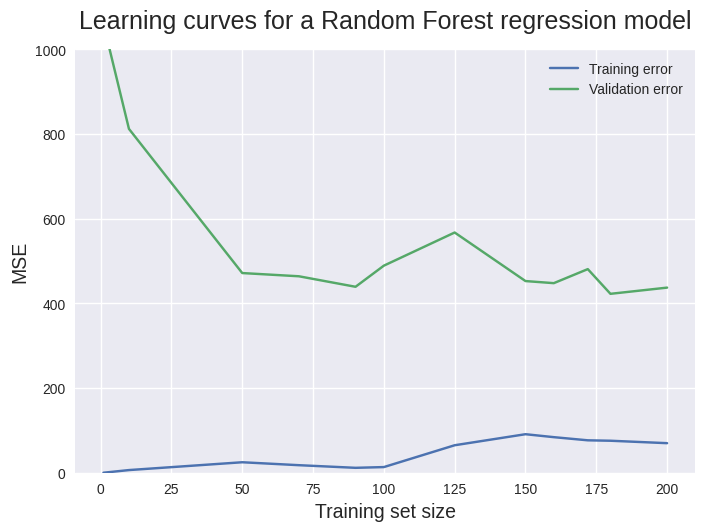

In [9]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Random Forest regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1000)

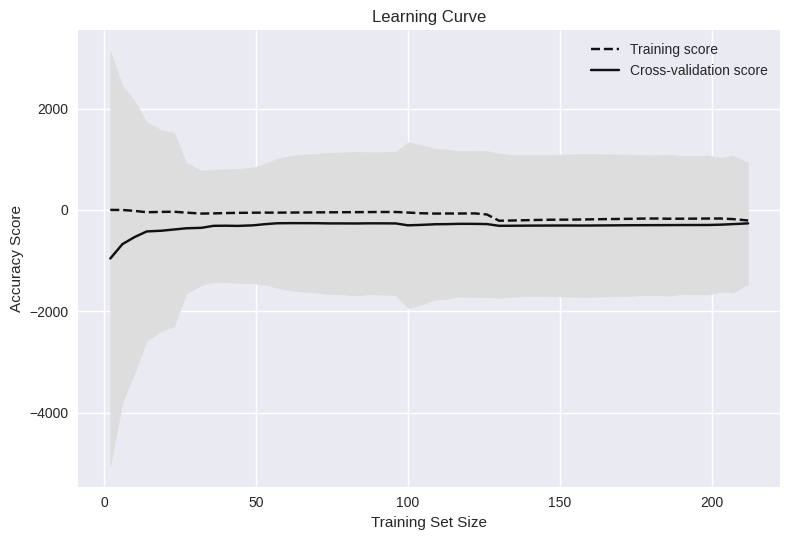

In [10]:
train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), x_expl_2opcion , Qmax,cv=100, scoring='neg_mean_squared_error', n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()

In [11]:
X,y=x_expl_2opcion,Qmax

In [12]:
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=1)

In [13]:
lr=RandomForestRegressor()
lr.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor()

In [14]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.9700835690305429
Test score: 0.8406104431123165


In [15]:
lc = learning_curve(KNeighborsRegressor(n_neighbors=5),X_train,y_train,cv=5)
samples, train, test = lc[0], lc[1], lc[2]
lc

(array([ 12,  41,  70,  99, 128]),
 array([[0.26182247, 0.35585325, 0.35585325, 0.35585325, 0.35585325],
        [0.47523804, 0.66920992, 0.75593655, 0.75593655, 0.75593655],
        [0.55750562, 0.71956722, 0.54750911, 0.54752322, 0.54752322],
        [0.75810753, 0.59784977, 0.74641824, 0.59249897, 0.59576696],
        [0.78044048, 0.65529068, 0.7643484 , 0.66961286, 0.75497521]]),
 array([[-0.27431734,  0.03977426,  0.05290875,  0.0823068 ,  0.37496846],
        [ 0.59358567,  0.13337342,  0.50095087,  0.24916888,  0.72572915],
        [ 0.58525169,  0.15426296,  0.42607874,  0.44090407,  0.84774411],
        [ 0.64121164,  0.57743949,  0.24789432,  0.41738609,  0.83335615],
        [ 0.53678115,  0.65258237,  0.33174463,  0.46629024,  0.88343071]]))

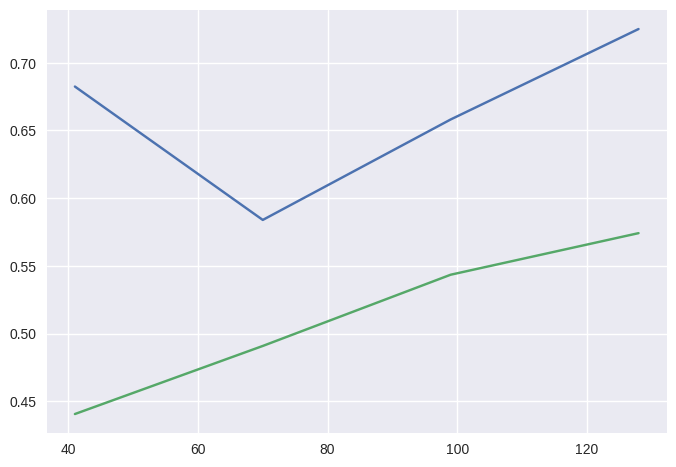

In [16]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:]);